In [64]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.DataFrame()

In [66]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [6,2,3,7,8,7,1,6,8,2]
df['label'] = [1,1,0,1,0,1,0,1,0,1]

In [67]:
df

,X1,X2,label
0,1,6,1
1,2,2,1
2,3,3,0
3,4,7,1
4,5,8,0
5,6,7,1
6,6,1,0
7,7,6,1
8,9,8,0
9,9,2,1


<Axes: xlabel='X1', ylabel='X2'>

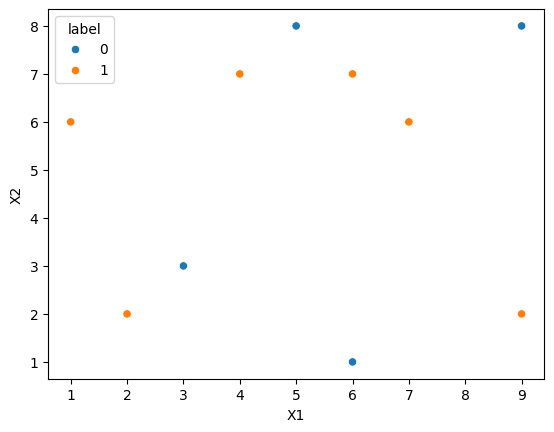

In [68]:
sns.scatterplot(data=df, x='X1', y='X2', hue='label')

In [69]:
df['weight'] = 1/df.shape[0]

In [70]:
df

,X1,X2,label,weight
0,1,6,1,0.1
1,2,2,1,0.1
2,3,3,0,0.1
3,4,7,1,0.1
4,5,8,0,0.1
5,6,7,1,0.1
6,6,1,0,0.1
7,7,6,1,0.1
8,9,8,0,0.1
9,9,2,1,0.1


In [71]:
df['weights'] = 1/len(df)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [74]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.5, '  False')]

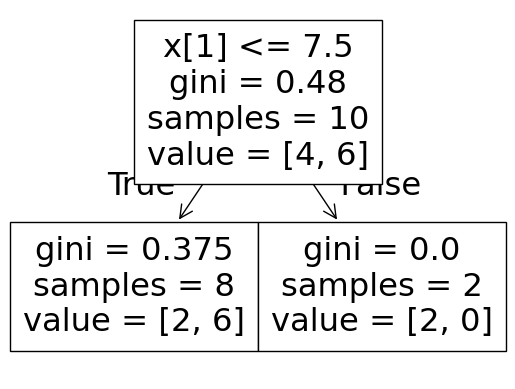

In [75]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

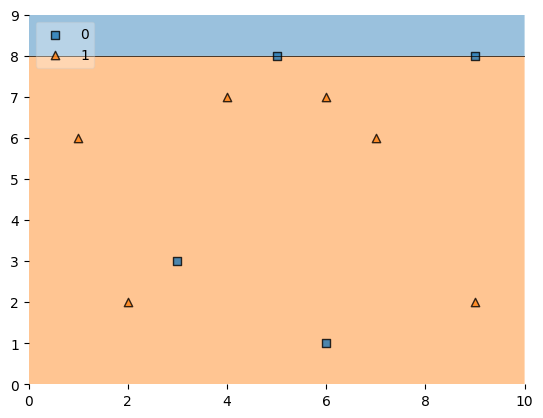

In [76]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [77]:
df['y_pred'] = dt1.predict(x)

In [78]:
df

,X1,X2,label,weight,weights,y_pred
0,1,6,1,0.1,0.1,1
1,2,2,1,0.1,0.1,1
2,3,3,0,0.1,0.1,1
3,4,7,1,0.1,0.1,1
4,5,8,0,0.1,0.1,0
5,6,7,1,0.1,0.1,1
6,6,1,0,0.1,0.1,1
7,7,6,1,0.1,0.1,1
8,9,8,0,0.1,0.1,0
9,9,2,1,0.1,0.1,1


In [79]:
def calculate_weight(error):
  return 0.5*np.log((1-error)/(error))

In [80]:
alpha1 = calculate_weight(0.2)


In [81]:
alpha1

np.float64(0.6931471805599453)

In [82]:
def update_row_weights(row,alpha=0.6931):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)


In [83]:
df['new_weights'] = df.apply(update_row_weights,axis=1)

In [84]:
df

,X1,X2,label,weight,weights,y_pred,new_weights
0,1,6,1,0.1,0.1,1,0.050002
1,2,2,1,0.1,0.1,1,0.050002
2,3,3,0,0.1,0.1,1,0.199991
3,4,7,1,0.1,0.1,1,0.050002
4,5,8,0,0.1,0.1,0,0.050002
5,6,7,1,0.1,0.1,1,0.050002
6,6,1,0,0.1,0.1,1,0.199991
7,7,6,1,0.1,0.1,1,0.050002
8,9,8,0,0.1,0.1,0,0.050002
9,9,2,1,0.1,0.1,1,0.050002


In [86]:
df['new_weights'].sum()

np.float64(0.8000000008904021)

In [87]:
df['normalised_weights'] = df['new_weights']/df['new_weights'].sum()

In [88]:
df


,X1,X2,label,weight,weights,y_pred,new_weights,normalised_weights
0,1,6,1,0.1,0.1,1,0.050002,0.062503
1,2,2,1,0.1,0.1,1,0.050002,0.062503
2,3,3,0,0.1,0.1,1,0.199991,0.249988
3,4,7,1,0.1,0.1,1,0.050002,0.062503
4,5,8,0,0.1,0.1,0,0.050002,0.062503
5,6,7,1,0.1,0.1,1,0.050002,0.062503
6,6,1,0,0.1,0.1,1,0.199991,0.249988
7,7,6,1,0.1,0.1,1,0.050002,0.062503
8,9,8,0,0.1,0.1,0,0.050002,0.062503
9,9,2,1,0.1,0.1,1,0.050002,0.062503


In [89]:
df['normalised_weights'].sum()

np.float64(1.0)

In [90]:
df['cumsum_upper'] = np.cumsum(df['normalised_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised_weights']

In [93]:
df[['X1','X2','label','weights','y_pred','new_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,new_weights,cumsum_lower,cumsum_upper
0,1,6,1,0.1,1,0.050002,0.000000,0.062503
1,2,2,1,0.1,1,0.050002,0.062503,0.125006
2,3,3,0,0.1,1,0.199991,0.125006,0.374994
3,4,7,1,0.1,1,0.050002,0.374994,0.437497
4,5,8,0,0.1,0,0.050002,0.437497,0.500000
5,6,7,1,0.1,1,0.050002,0.500000,0.562503
6,6,1,0,0.1,1,0.199991,0.562503,0.812491
7,7,6,1,0.1,1,0.050002,0.812491,0.874994
8,9,8,0,0.1,0,0.050002,0.874994,0.937497
9,9,2,1,0.1,1,0.050002,0.937497,1.000000


In [94]:
def new_dataset(df):
  indices = []
  for i in range (df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [103]:
index_values = new_dataset(df)

In [104]:
index_values


[1, 6, 5, 6, 8, 6, 7, 2, 8, 0]

In [105]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weight
1,2,2,1,0.1
6,6,1,0,0.1
5,6,7,1,0.1
6,6,1,0,0.1
8,9,8,0,0.1
6,6,1,0,0.1
7,7,6,1,0.1
2,3,3,0,0.1
8,9,8,0,0.1
0,1,6,1,0.1


In [106]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [107]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [108]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.625, 0.5, '  False')]

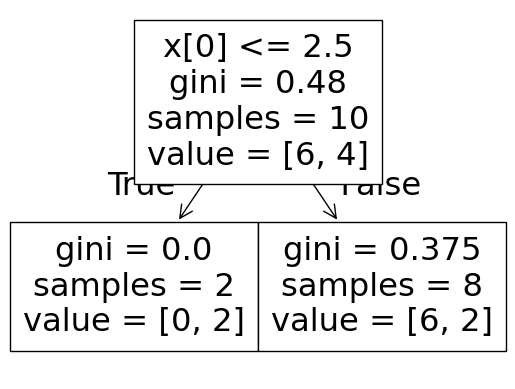

In [109]:
plot_tree(dt2)

<Axes: >

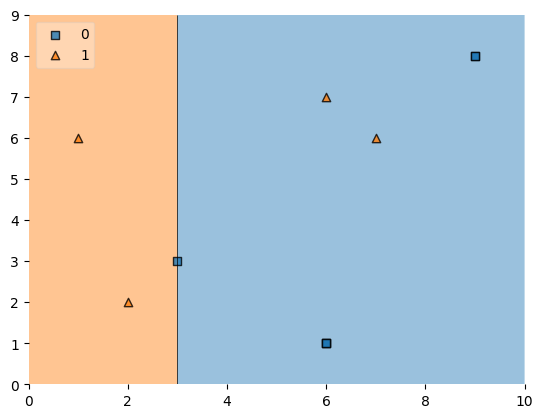

In [110]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [111]:
second_df['y_pred'] = dt2.predict(x)

In [112]:
second_df

,X1,X2,label,weight,y_pred
1,2,2,1,0.1,1
6,6,1,0,0.1,0
5,6,7,1,0.1,0
6,6,1,0,0.1,0
8,9,8,0,0.1,0
6,6,1,0,0.1,0
7,7,6,1,0.1,0
2,3,3,0,0.1,0
8,9,8,0,0.1,0
0,1,6,1,0.1,1


In [117]:
alpha2 = calculate_weight(0.2)

In [118]:
alpha2

np.float64(0.6931471805599453)

In [119]:
def update_row_weights(row,alpha=0.6931):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)


In [120]:
second_df['new_weights'] = df.apply(update_row_weights,axis=1)

In [121]:
second_df

,X1,X2,label,weight,y_pred,new_weights
1,2,2,1,0.1,1,0.050002
6,6,1,0,0.1,0,0.199991
5,6,7,1,0.1,0,0.050002
6,6,1,0,0.1,0,0.199991
8,9,8,0,0.1,0,0.050002
6,6,1,0,0.1,0,0.199991
7,7,6,1,0.1,0,0.050002
2,3,3,0,0.1,0,0.199991
8,9,8,0,0.1,0,0.050002
0,1,6,1,0.1,1,0.050002


In [122]:
second_df['new_weights'].sum()

np.float64(1.0999764109443215)

In [124]:
second_df['normalised_weights'] = second_df['new_weights']/second_df['new_weights'].sum()

In [126]:
second_df['normalised_weights'].sum()

np.float64(1.0)

In [127]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalised_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalised_weights']

In [128]:

df[['X1','X2','label','weights','y_pred','new_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,new_weights,cumsum_lower,cumsum_upper
0,1,6,1,0.1,1,0.050002,0.000000,0.062503
1,2,2,1,0.1,1,0.050002,0.062503,0.125006
2,3,3,0,0.1,1,0.199991,0.125006,0.374994
3,4,7,1,0.1,1,0.050002,0.374994,0.437497
4,5,8,0,0.1,0,0.050002,0.437497,0.500000
5,6,7,1,0.1,1,0.050002,0.500000,0.562503
6,6,1,0,0.1,1,0.199991,0.562503,0.812491
7,7,6,1,0.1,1,0.050002,0.812491,0.874994
8,9,8,0,0.1,0,0.050002,0.874994,0.937497
9,9,2,1,0.1,1,0.050002,0.937497,1.000000


In [129]:
print(alpha1,alpha2)

0.6931471805599453 0.6931471805599453


In [130]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [131]:
dt2.predict(query
)

array([1])

In [132]:
alpha1*(1) + alpha2*(1)

np.float64(1.3862943611198906)

In [134]:
np.sign(1.386)

np.float64(1.0)